# AlÄ±ÅŸveriÅŸ DavranÄ±ÅŸÄ± ve Gelir Analizi 

## Veri HazÄ±rlÄ±ÄŸÄ±

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Shoppers_Behaviour_and_Revenue.csv')

# Rename columns as per the instructions
column_names = {
    'Administrative': 'YonetimSayfasi',
    'Administrative_Duration': 'YonetimSuresi',
    'Informational': 'BilgiSayfasi',
    'Informational_Duration': 'BilgiSuresi',
    'ProductRelated': 'UrunSayfasi',
    'ProductRelated_Duration': 'UrunSuresi',
    'BounceRates': 'HemenCikmaOrani',
    'ExitRates': 'SayfaCikisOrani',
    'PageValues': 'SayfaDegeri',
    'SpecialDay': 'OzelGunSkoru',
    'Month': 'Ay',
    'OperatingSystems': 'IsletimSistemi',
    'Browser': 'Tarayici',
    'Region': 'Bolge',
    'TrafficType': 'TrafikTuru',
    'VisitorType': 'ZiyaretciTuru',
    'Weekend': 'HaftaSonu',
    'Revenue': 'SatinAlim'
}
df = df.rename(columns=column_names)

In [2]:
df.head()

YonetimSayfasi  YonetimSuresi  BilgiSayfasi  BilgiSuresi  UrunSayfasi  \
0               0            0.0             0          0.0            1   
1               0            0.0             0          0.0            2   
2               0            0.0             0          0.0            1   
3               0            0.0             0          0.0            2   
4               0            0.0             0          0.0           10   

   UrunSuresi  HemenCikmaOrani  SayfaCikisOrani  SayfaDegeri  OzelGunSkoru  \
0    0.000000             0.20             0.20          0.0           0.0   
1   64.000000             0.00             0.10          0.0           0.0   
2    0.000000             0.20             0.20          0.0           0.0   
3    2.666667             0.05             0.14          0.0           0.0   
4  627.500000             0.02             0.05          0.0           0.0   

    Ay  IsletimSistemi  Tarayici  Bolge  TrafikTuru      ZiyaretciTuru  \
0  Feb               1         1      1           1  Returning_Visitor   
1  Feb               2         2      1           2  Returning_Visitor   
2  Feb               4         1      9           3  Returning_Visitor   
3  Feb               3         2      2           4  Returning_Visitor   
4  Feb               3         3      1           4  Returning_Visitor   

   HaftaSonu  SatinAlim  
0      False      False  
1      False      False  
2      False      False  
3      False      False  
4       True      False

In [108]:
# Data Cleaning: Handle missing values (if any) and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Correct data types
df['HaftaSonu'] = df['HaftaSonu'].astype(bool)
df['SatinAlim'] = df['SatinAlim'].astype(bool)

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['Ay', 'IsletimSistemi', 'Tarayici', 'Bolge', 'TrafikTuru', 'ZiyaretciTuru'], drop_first=True)


In [109]:
df.dtypes

YonetimSayfasi                       int64
YonetimSuresi                      float64
BilgiSayfasi                         int64
BilgiSuresi                        float64
UrunSayfasi                          int64
UrunSuresi                         float64
HemenCikmaOrani                    float64
SayfaCikisOrani                    float64
SayfaDegeri                        float64
OzelGunSkoru                       float64
HaftaSonu                             bool
SatinAlim                             bool
Ay_Dec                                bool
Ay_Feb                                bool
Ay_Jul                                bool
Ay_June                               bool
Ay_Mar                                bool
Ay_May                                bool
Ay_Nov                                bool
Ay_Oct                                bool
Ay_Sep                                bool
IsletimSistemi_2                      bool
IsletimSistemi_3                      bool
IsletimSist

In [110]:
df.head()

YonetimSayfasi  YonetimSuresi  BilgiSayfasi  BilgiSuresi  UrunSayfasi  \
0               0            0.0             0          0.0            1   
1               0            0.0             0          0.0            2   
2               0            0.0             0          0.0            1   
3               0            0.0             0          0.0            2   
4               0            0.0             0          0.0           10   

   UrunSuresi  HemenCikmaOrani  SayfaCikisOrani  SayfaDegeri  OzelGunSkoru  \
0    0.000000             0.20             0.20          0.0           0.0   
1   64.000000             0.00             0.10          0.0           0.0   
2    0.000000             0.20             0.20          0.0           0.0   
3    2.666667             0.05             0.14          0.0           0.0   
4  627.500000             0.02             0.05          0.0           0.0   

   HaftaSonu  SatinAlim  Ay_Dec  Ay_Feb  Ay_Jul  Ay_June  Ay_Mar  Ay_May  \
0      False      False   False    True   False    False   False   False   
1      False      False   False    True   False    False   False   False   
2      False      False   False    True   False    False   False   False   
3      False      False   False    True   False    False   False   False   
4       True      False   False    True   False    False   False   False   

   Ay_Nov  Ay_Oct  Ay_Sep  IsletimSistemi_2  IsletimSistemi_3  \
0   False   False   False             False             False   
1   False   False   False              True             False   
2   False   False   False             False             False   
3   False   False   False             False              True   
4   False   False   False             False              True   

   IsletimSistemi_4  IsletimSistemi_5  IsletimSistemi_6  IsletimSistemi_7  \
0             False             False             False             False   
1             False             False             False             False   
2              True             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   IsletimSistemi_8  Tarayici_2  Tarayici_3  Tarayici_4  Tarayici_5  \
0             False       False       False       False       False   
1             False        True       False       False       False   
2             False       False       False       False       False   
3             False        True       False       False       False   
4             False       False        True       False       False   

   Tarayici_6  Tarayici_7  Tarayici_8  Tarayici_9  Tarayici_10  Tarayici_11  \
0       False       False       False       False        False        False   
1       False       False       False       False        False        False   
2       False       False       False       False        False        False   
3       False       False       False       False        False        False   
4       False       False       False       False        False        False   

   Tarayici_12  Tarayici_13  Bolge_2  Bolge_3  Bolge_4  Bolge_5  Bolge_6  \
0        False        False    False    False    False    False    False   
1        False        False    False    False    False    False    False   
2        False        False    False    False    False    False    False   
3        False        False     True    False    False    False    False   
4        False        False    False    False    False    False    False   

   Bolge_7  Bolge_8  Bolge_9  TrafikTuru_2  TrafikTuru_3  TrafikTuru_4  \
0    False    False    False         False         False         False   
1    False    False    False          True         False         False   
2    False    False     True         False          True         False   
3    False    False    False         False         False          True   
4    False    False    False         

## KeÅŸifsel Veri Analizi (EDA)

Veri setinin temel Ã¶zelliklerini anlamak iÃ§in keÅŸifsel veri analizi yapÄ±lmÄ±ÅŸtÄ±r. AÅŸaÄŸÄ±daki bulgular ve gÃ¶rselleÅŸtirmeler elde edilmiÅŸtir:

*   **Ä°statistiksel Ã–zetler:** SayÄ±sal deÄŸiÅŸkenlerin temel istatistiksel Ã¶zetleri incelenmiÅŸtir.
*   **HaftaSonu ve SatÄ±n Alma Ä°liÅŸkisi:** Hafta sonu ziyaretlerinin satÄ±n alma oranlarÄ± Ã¼zerindeki etkisi incelenmiÅŸtir. (Bkz. HaftaSonu_SatinAlim.png)
*   **ZiyaretÃ§i TÃ¼rÃ¼ ve SatÄ±n Alma Ä°liÅŸkisi:** Geri dÃ¶nen ziyaretÃ§iler ile yeni ziyaretÃ§ilerin satÄ±n alma davranÄ±ÅŸlarÄ± karÅŸÄ±laÅŸtÄ±rÄ±lmÄ±ÅŸtÄ±r. (Bkz. ZiyaretciTuru_SatinAlim.png)
*   **Ay ve SatÄ±n Alma Ä°liÅŸkisi:** YÄ±lÄ±n farklÄ± aylarÄ±ndaki satÄ±n alma eÄŸilimleri analiz edilmiÅŸtir. (Bkz. Ay_SatinAlim.png)
*   **Sayfa DeÄŸeri ve SatÄ±n Alma Ä°liÅŸkisi:** Sayfa deÄŸerlerinin satÄ±n alma kararlarÄ± Ã¼zerindeki etkisi incelenmiÅŸtir. (Bkz. SayfaDegeri_SatinAlim.png)
*   **DeÄŸiÅŸkenler ArasÄ± Korelasyon:** DeÄŸiÅŸkenler arasÄ±ndaki iliÅŸkileri gÃ¶steren bir Ä±sÄ± haritasÄ± oluÅŸturulmuÅŸtur. (Bkz. Korelasyon_Isi_Haritasi.png)


In [111]:
df.describe()

YonetimSayfasi  YonetimSuresi  BilgiSayfasi   BilgiSuresi  \
count    12205.000000   12205.000000  12205.000000  12205.000000   
mean         2.338878      81.646331      0.508726     34.825454   
std          3.330436     177.491845      1.275617    141.424807   
min          0.000000       0.000000      0.000000      0.000000   
25%          0.000000       0.000000      0.000000      0.000000   
50%          1.000000       9.000000      0.000000      0.000000   
75%          4.000000      94.700000      0.000000      0.000000   
max         27.000000    3398.750000     24.000000   2549.375000   

        UrunSayfasi    UrunSuresi  HemenCikmaOrani  SayfaCikisOrani  \
count  12205.000000  12205.000000     12205.000000     12205.000000   
mean      32.045637   1206.982457         0.020370         0.041466   
std       44.593649   1919.601400         0.045255         0.046163   
min        0.000000      0.000000         0.000000         0.000000   
25%        8.000000    193.000000         0.000000         0.014231   
50%       18.000000    608.942857         0.002899         0.025000   
75%       38.000000   1477.154762         0.016667         0.048529   
max      705.000000  63973.522230         0.200000         0.200000   

        SayfaDegeri  OzelGunSkoru  
count  12205.000000  12205.000000  
mean       5.949574      0.061942  
std       18.653671      0.199666  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      361.763742      1.000000

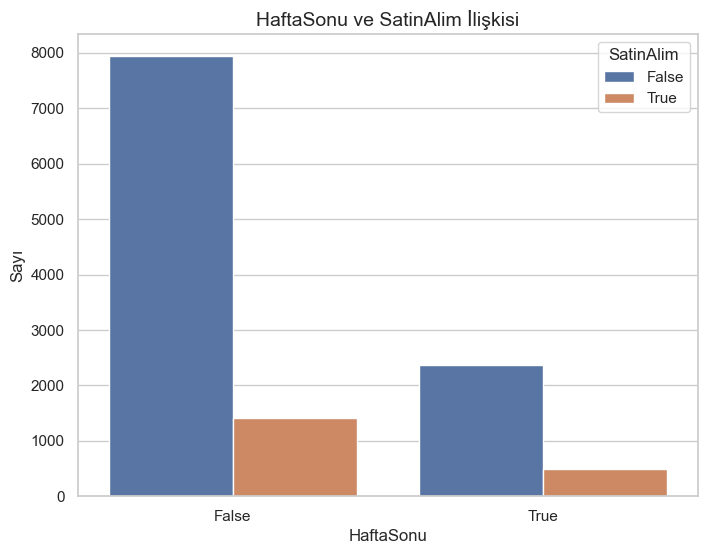

In [112]:
# HaftaSonu vs SatinAlim
plt.figure(figsize=(8, 6))
sns.countplot(x='HaftaSonu', hue='SatinAlim', data=df)
plt.title('HaftaSonu ve SatinAlim Ä°liÅŸkisi')
plt.xlabel('HaftaSonu')
plt.ylabel('SayÄ±')
plt.show()

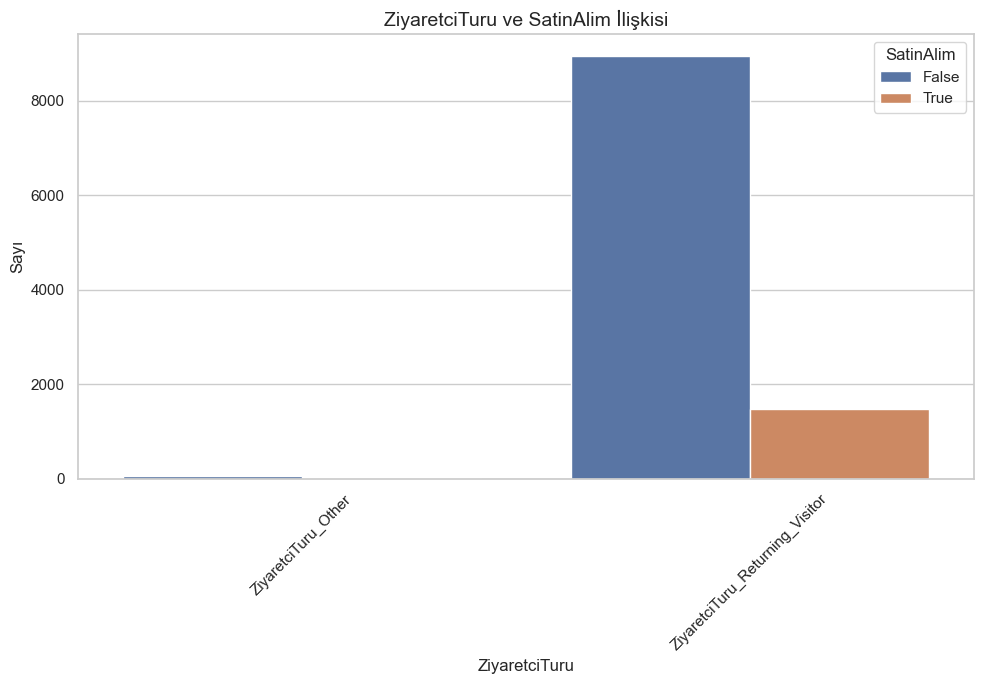

In [113]:
# One-hot encoded ziyaretÃ§i tÃ¼rÃ¼ sÃ¼tunlarÄ±nÄ± seÃ§
visitor_type_cols = [col for col in df.columns if 'ZiyaretciTuru_' in col]
temp_df = df[visitor_type_cols + ['SatinAlim']].copy()

# Veri Ã§erÃ§evesini "melt" et (uzun formata dÃ¶nÃ¼ÅŸtÃ¼r)
melted_df = temp_df.melt(id_vars=['SatinAlim'], var_name='ZiyaretciTuru', value_name='Value')
melted_df = melted_df[melted_df['Value'] == 1]  # Sadece aktif satÄ±rlarÄ± al

# GÃ¶rselleÅŸtir
plt.figure(figsize=(10, 7))
sns.countplot(x='ZiyaretciTuru', hue='SatinAlim', data=melted_df)
plt.title('ZiyaretciTuru ve SatinAlim Ä°liÅŸkisi')
plt.xlabel('ZiyaretciTuru')
plt.ylabel('SayÄ±')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


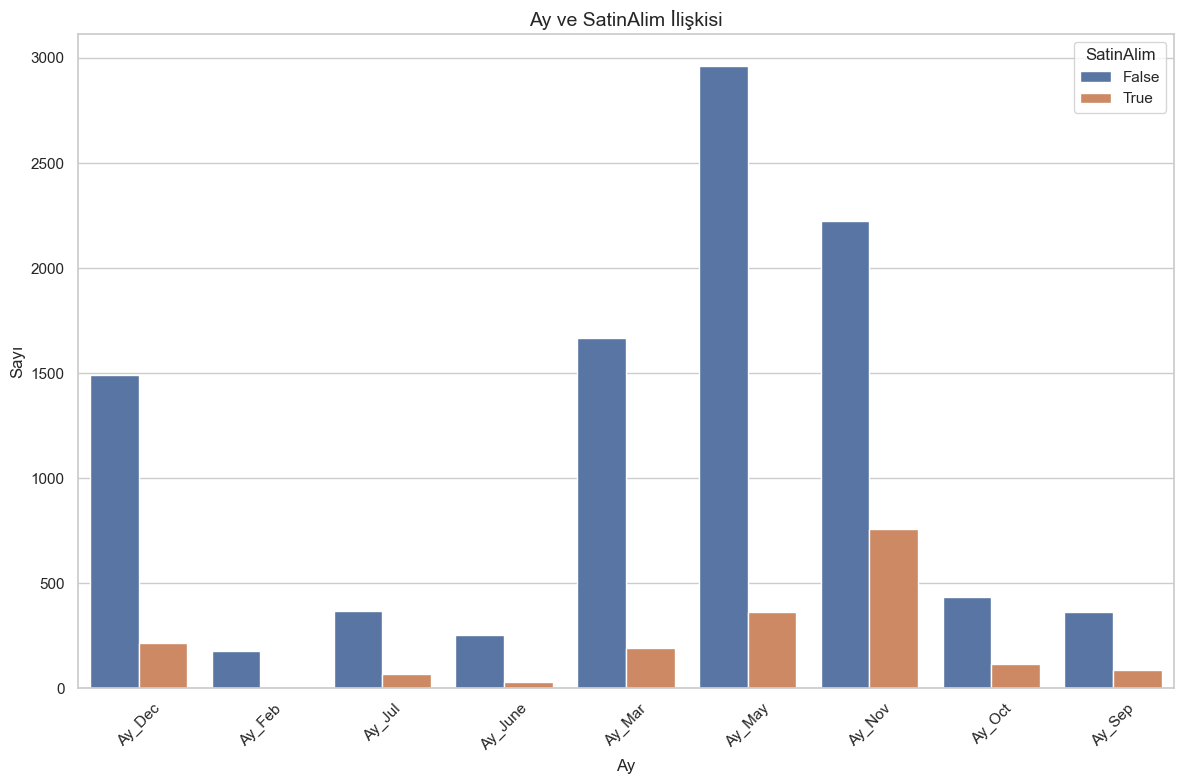

In [114]:
# Ay sÃ¼tunlarÄ±nÄ± al (One-hot encoded)
month_cols = [col for col in df.columns if 'Ay_' in col]
temp_df_month = df[month_cols + ['SatinAlim']].copy()

# Melt iÅŸlemi
melted_df_month = temp_df_month.melt(id_vars=['SatinAlim'], var_name='Ay', value_name='Value')
melted_df_month = melted_df_month[melted_df_month['Value'] == 1]

# Grafik
plt.figure(figsize=(12, 8))
sns.countplot(x='Ay', hue='SatinAlim', data=melted_df_month)
plt.title('Ay ve SatinAlim Ä°liÅŸkisi')
plt.xlabel('Ay')
plt.ylabel('SayÄ±')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


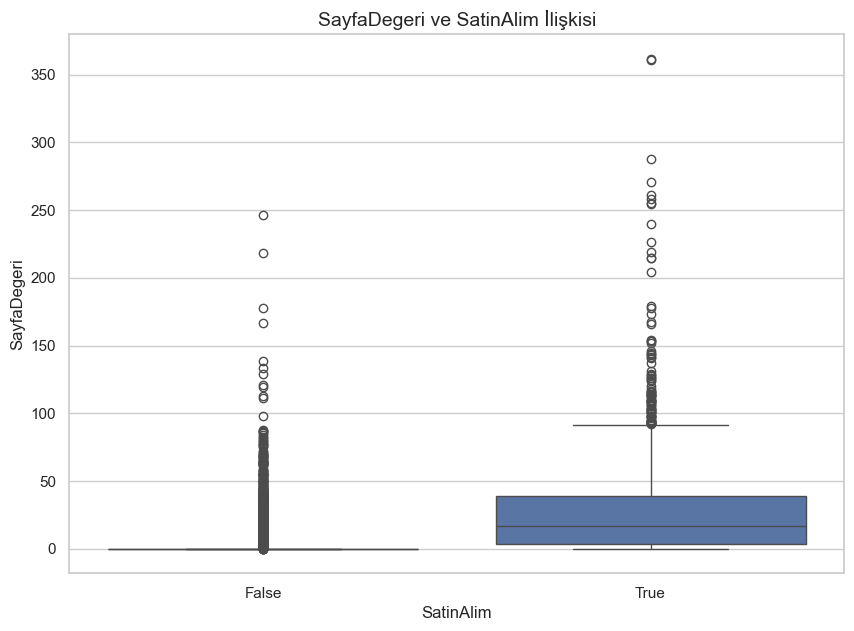

In [115]:
# Sayfa DeÄŸeri = Toplam SatÄ±ÅŸ Geliri (Revenue) / Benzersiz Sayfa GÃ¶rÃ¼ntÃ¼leme SayÄ±sÄ± (Unique Pageviews)
plt.figure(figsize=(10, 7))
sns.boxplot(x='SatinAlim', y='SayfaDegeri', data=df)
plt.title('SayfaDegeri ve SatinAlim Ä°liÅŸkisi')
plt.xlabel('SatinAlim')
plt.ylabel('SayfaDegeri')
plt.show()


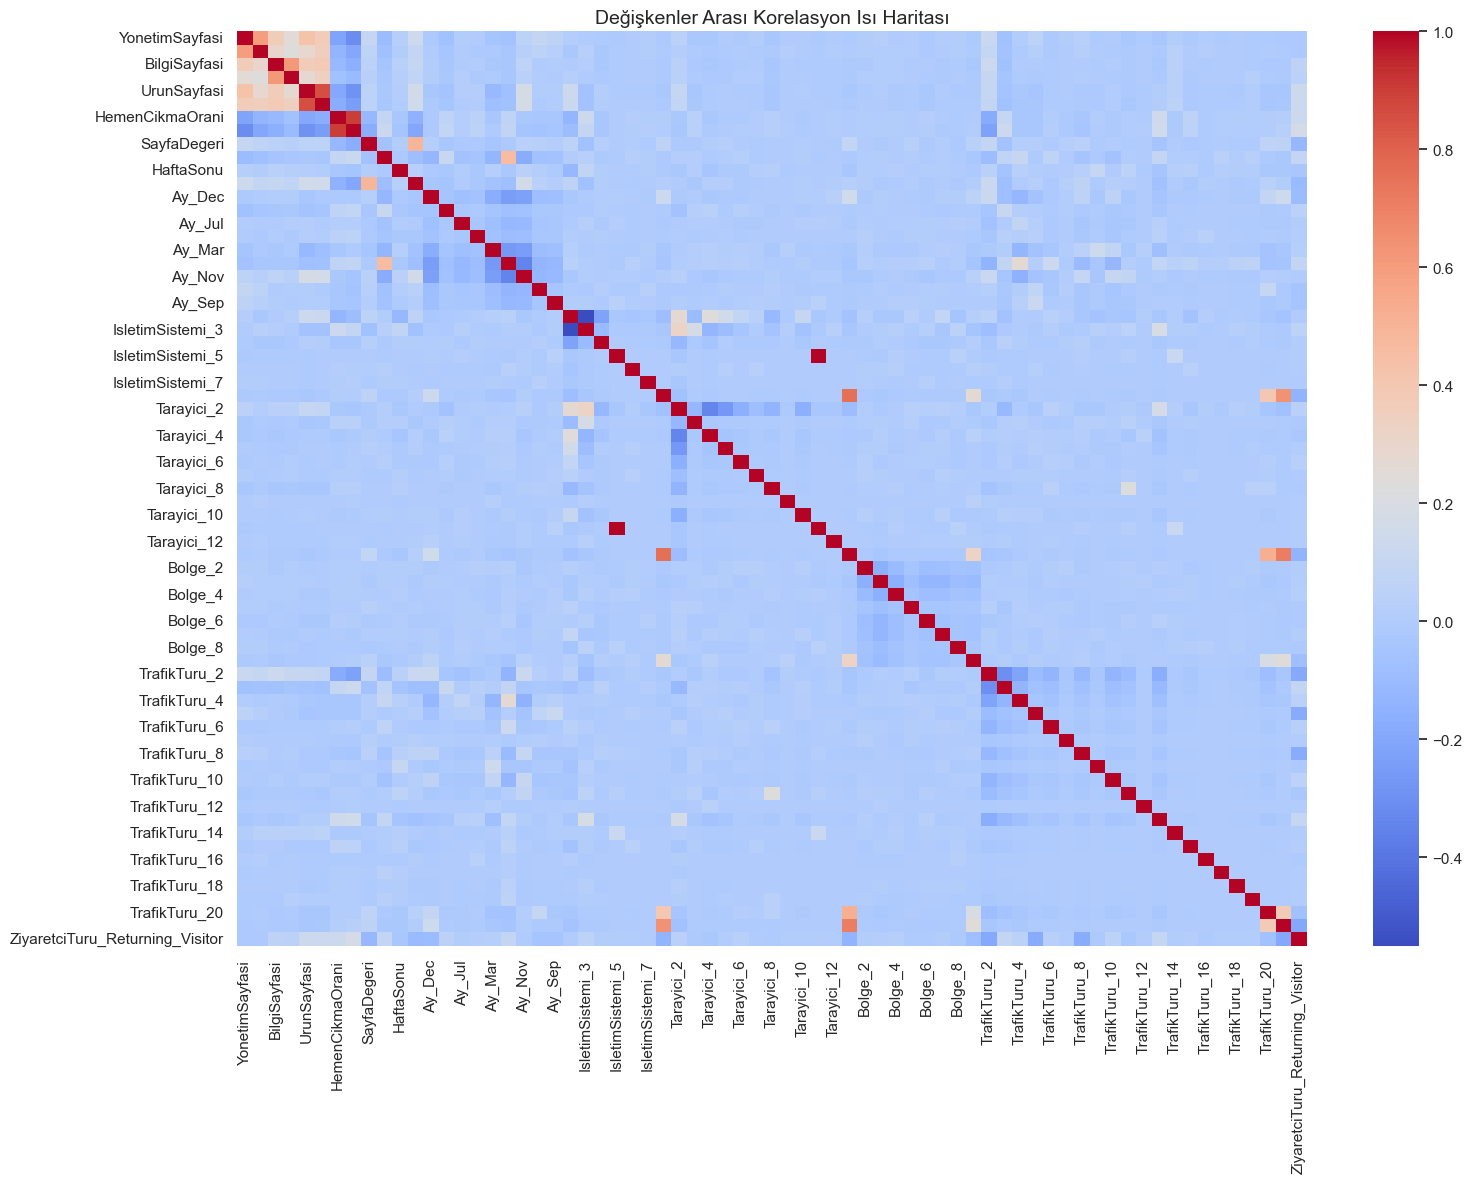

In [116]:
# Boolean sÃ¼tunlarÄ± int'e Ã§evir
df_corr = df.copy()
df_corr['HaftaSonu'] = df_corr['HaftaSonu'].astype(int)
df_corr['SatinAlim'] = df_corr['SatinAlim'].astype(int)

# Korelasyon matrisi
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr.corr(), annot=False, cmap='coolwarm')
plt.title('DeÄŸiÅŸkenler ArasÄ± Korelasyon IsÄ± HaritasÄ±')
plt.tight_layout()
plt.show()


## Ã–zellik MÃ¼hendisliÄŸi

Model performansÄ±nÄ± artÄ±rmak ve daha fazla iÃ§gÃ¶rÃ¼ elde etmek iÃ§in yeni Ã¶zellikler tÃ¼retilmiÅŸtir:

*   **ToplamSure:** YÃ¶netim, Bilgi ve ÃœrÃ¼n sayfalarÄ±nda geÃ§irilen toplam sÃ¼re.
*   **EtkilesimOrani:** Toplam sayfa sayÄ±sÄ± ile toplam sÃ¼re arasÄ±ndaki oran, ziyaretÃ§inin etkileÅŸim dÃ¼zeyini gÃ¶sterir.
*   **ZiyaretciBinary:** ZiyaretÃ§i tÃ¼rÃ¼nÃ¼ ikili (0: Yeni, 1: Geri DÃ¶nen) bir deÄŸiÅŸkene dÃ¶nÃ¼ÅŸtÃ¼rÃ¼r.
*   **YuksekDegerliSayfa:** Sayfa deÄŸeri ortalamanÄ±n Ã¼zerinde olan sayfalarÄ± belirten ikili bir deÄŸiÅŸken.


In [117]:
# ToplamSure = gezinme sÃ¼relerinin toplamÄ±
df["ToplamSure"] = df["YonetimSuresi"] + df["BilgiSuresi"] + df["UrunSuresi"]

# EtkilesimOrani = toplam sayfa sayÄ±sÄ± / toplam sÃ¼re (sÄ±fÄ±ra bÃ¶lme durumuna karÅŸÄ± Ã¶nlem alÄ±ndÄ±)
df["EtkilesimOrani"] = (df["YonetimSayfasi"] + df["BilgiSayfasi"] + df["UrunSayfasi"]) / (df["ToplamSure"] + 1e-6)

# ZiyaretciBinary = 1 ise geri dÃ¶nen ziyaretÃ§i, 0 ise yeni ziyaretÃ§i
df["ZiyaretciBinary"] = df["ZiyaretciTuru_Returning_Visitor"].astype(int)  # Geri dÃ¶nen ziyaretÃ§i iÃ§in 1, diÄŸerleri iÃ§in 0

# YuksekDegerliSayfa = SayfaDegeri ortalamanÄ±n Ã¼zerindeyse 1, deÄŸilse 0
df["YuksekDegerliSayfa"] = (df["SayfaDegeri"] > df["SayfaDegeri"].mean()).astype(int)

## Makine Ã–ÄŸrenmesi Modelleri

`SatinAlim` (satÄ±n alma olup olmadÄ±ÄŸÄ±) deÄŸiÅŸkenini tahmin etmek iÃ§in Ã¼Ã§ farklÄ± makine Ã¶ÄŸrenimi modeli eÄŸitilecek.

*   **Lojistik Regresyon (Logistic Regression)**
*   **Rastgele Orman (Random Forest)**
*   **XGBoost**


In [118]:
# Ã–zellikleri (X) ve hedef deÄŸiÅŸkeni (y) tanÄ±mla
X = df.drop("SatinAlim", axis=1)
y = df["SatinAlim"]

In [119]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eÄŸitim, %20 test olarak bÃ¶l
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lojistik Regresyon PerformansÄ±
Accuracy: 0.8886
Precision: 0.7123
Recall: 0.4171
F1-Score: 0.5261


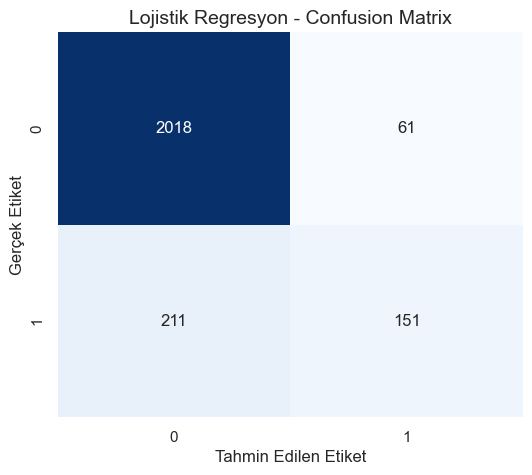

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

#  Modeli oluÅŸtur ve eÄŸit
log_model = LogisticRegression(random_state=42, solver='liblinear')
log_model.fit(X_train, y_train)

#  Tahmin yap
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

#  Performans metrikleri
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
roc = roc_auc_score(y_test, y_proba_log)
cm = confusion_matrix(y_test, y_pred_log)

#  SonuÃ§larÄ± yazdÄ±r
print("Lojistik Regresyon PerformansÄ±")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Confusion Matrix GÃ¶rselleÅŸtirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Lojistik Regresyon - Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("GerÃ§ek Etiket")
plt.show()




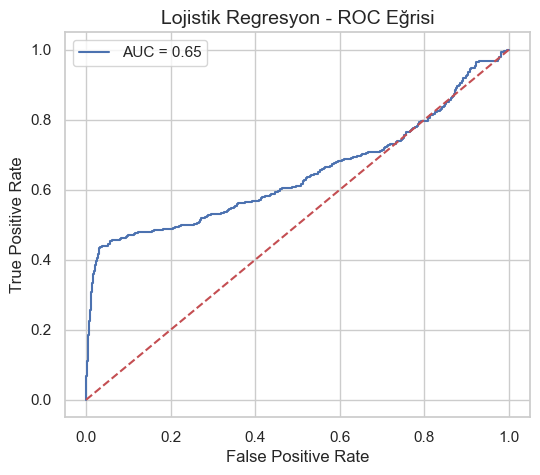

In [121]:
# ðŸ”´ ROC EÄŸrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_log)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Random tahmin Ã§izgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Lojistik Regresyon - ROC EÄŸrisi")
plt.legend()
plt.grid(True)
plt.show()

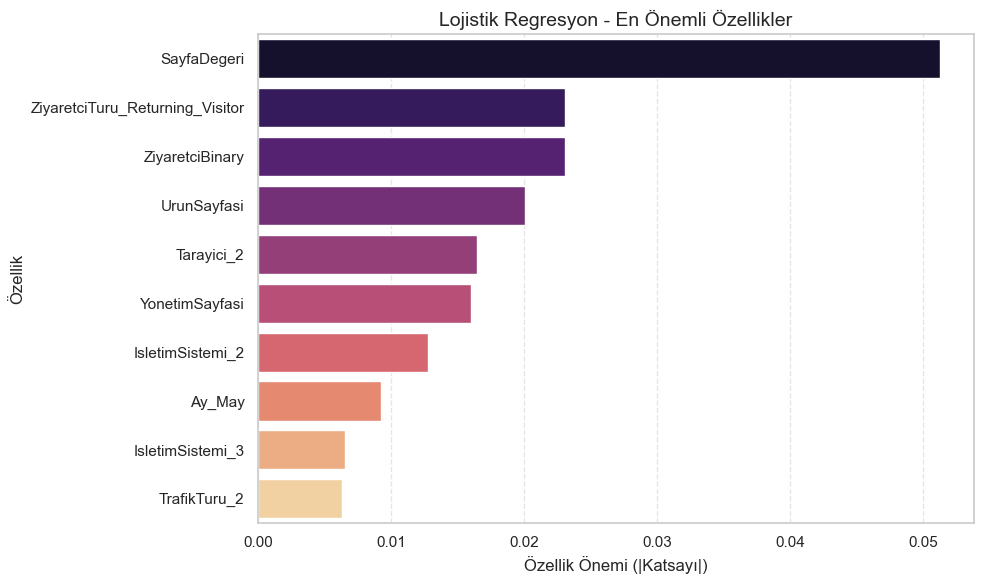

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# KatsayÄ±larÄ± al
coefficients = log_model.coef_[0]
feature_names = X_train.columns

# Mutlak katsayÄ± deÄŸerlerine gÃ¶re Ã¶nem derecelendirmesi
importance_df = pd.DataFrame({
    'Ã–zellik': feature_names,
    'Ã–nem': np.abs(coefficients)
}).sort_values(by='Ã–nem', ascending=False).head(10)  # Ä°lk 10 Ã¶nemli Ã¶zellik

# GÃ¶rselleÅŸtirme
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Ã–nem', y='Ã–zellik', hue='Ã–zellik', palette='magma', legend=False)
plt.title("Lojistik Regresyon - En Ã–nemli Ã–zellikler")
plt.xlabel("Ã–zellik Ã–nemi (|KatsayÄ±|)")
plt.ylabel("Ã–zellik")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Random Forest PerformansÄ±
Accuracy: 0.9005
Precision: 0.7245
Recall: 0.5304
F1-Score: 0.6124


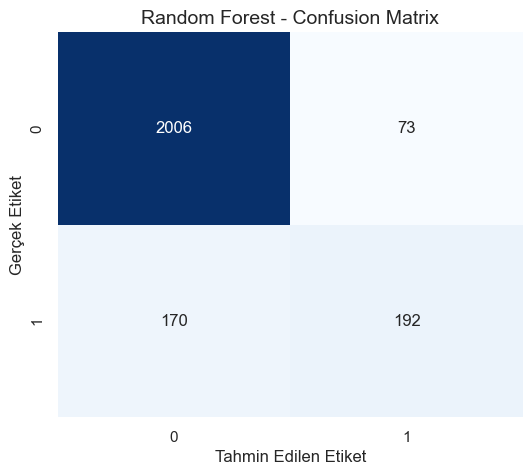

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

#  Modeli oluÅŸtur ve eÄŸit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#  Tahmin yap
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

#  Performans metrikleri
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc = roc_auc_score(y_test, y_proba_rf)
cm = confusion_matrix(y_test, y_pred_rf)

#  SonuÃ§larÄ± yazdÄ±r
print("Random Forest PerformansÄ±")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Confusion Matrix GÃ¶rselleÅŸtirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("GerÃ§ek Etiket")
plt.show()

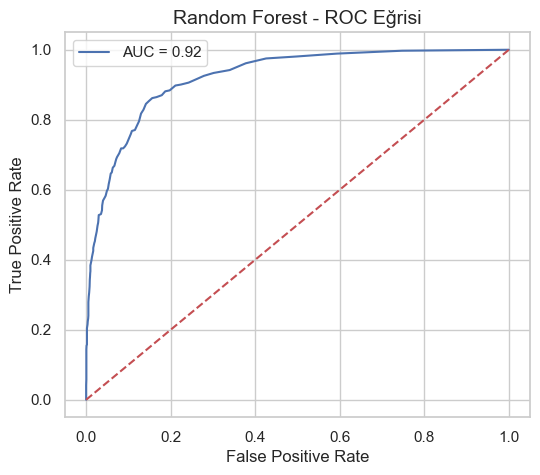

In [129]:
#  ROC EÄŸrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Random tahmin Ã§izgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC EÄŸrisi")
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# Ã–zellik Ã–nem GrafiÄŸi
import pandas as pd

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    "Ã–zellik": feature_names,
    "Ã–nem": feature_importances
}).sort_values(by="Ã–nem", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Ã–nem", y="Ã–zellik", hue="Ã–zellik", palette="magma", legend=False)
plt.title("Random Forest - En Ã–nemli Ã–zellikler")
plt.xlabel("Ã–nem Derecesi")
plt.ylabel("Ã–zellik")
plt.tight_layout()
plt.show()


In [130]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Modeli oluÅŸtur ve eÄŸit
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

#  Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

#  Performans metrikleri
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc = roc_auc_score(y_test, y_proba_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

#  SonuÃ§larÄ± yazdÄ±r
print("XGBoost PerformansÄ±")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Confusion Matrix GÃ¶rselleÅŸtirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("GerÃ§ek Etiket")
plt.show()




XGBoost PerformansÄ±
Accuracy: 0.8988
Precision: 0.6910
Recall: 0.5746
F1-Score: 0.6275


In [131]:
#  ROC EÄŸrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC EÄŸrisi")
plt.legend()
plt.grid(True)
plt.show()

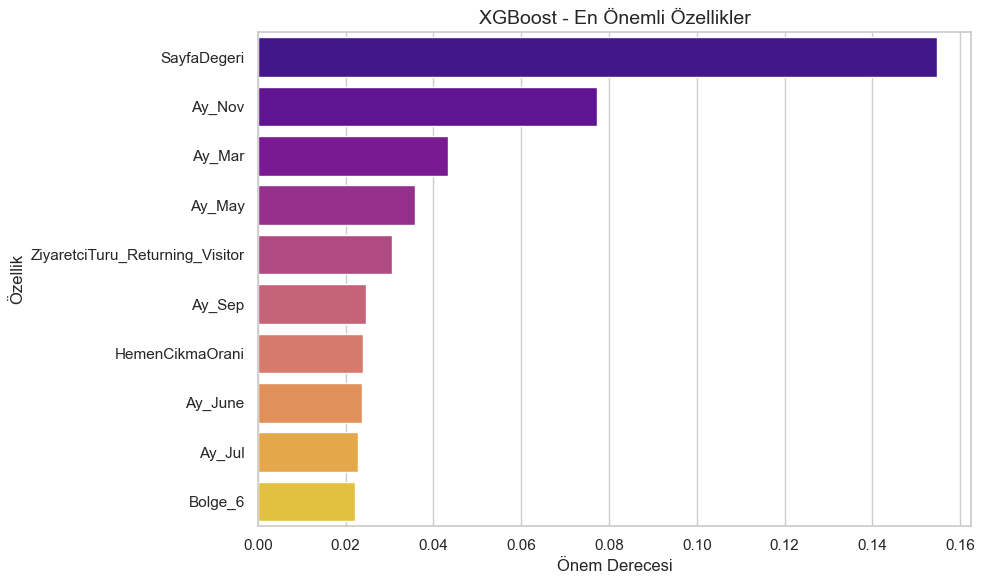

In [133]:
importance_values = xgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    "Ã–zellik": feature_names,
    "Ã–nem": importance_values
}).sort_values(by="Ã–nem", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Ã–nem", y="Ã–zellik", hue="Ã–zellik", palette="plasma", legend=False)
plt.title("XGBoost - En Ã–nemli Ã–zellikler")
plt.xlabel("Ã–nem Derecesi")
plt.ylabel("Ã–zellik")
plt.tight_layout()
plt.show()



**Model Performans Ã–zetleri:**

| Model AdÄ±          | Accuracy | Precision | Recall | F1-Score |ROC AUC|
|--------------------|----------|-----------|--------|----------|-------|
| XGBoost            | 0.8988   | 0.6910    | 0.5746 | 0.6275   | 0.93  |
| Random Forest      | 0.9005   | 0.7245    | 0.5304 | 0.6124   | 0.92  |
| Logistic Regression| 0.8886   | 0.7123    | 0.4171 | 0.5261   | 0.65  |

**XGBoost** modeli, en yÃ¼ksek Accuracy ve ROC AUC deÄŸerleriyle en iyi performansÄ± gÃ¶stermiÅŸtir
Ã¶zellikle F1-Score deÄŸeri.


## Hata Analizi

Modelin yanlÄ±ÅŸ tahmin ettiÄŸi durumlar incelenmiÅŸtir. HatalarÄ±n `ZiyaretciTuru` veya `Ay` ile iliÅŸkili olup olmadÄ±ÄŸÄ±na bakÄ±lmÄ±ÅŸtÄ±r. Analiz, Ã¶zellikle geri dÃ¶nen ziyaretÃ§iler ve Mart ayÄ± ile ilgili hatalarÄ±n daha sÄ±k olduÄŸunu gÃ¶stermiÅŸtir.


In [57]:
# HatalÄ± tahmin indekslerini bul (Ã¶rneÄŸin lojistik regresyon iÃ§in)
hatali_indexler = X_test[(y_test != y_pred_log)].index
hatali_kayitlar = X_test.loc[hatali_indexler].copy()

# ZiyaretciTuru sÃ¼tununu yeniden oluÅŸtur
def geri_don_zayaretci_turu(row):
    if 'ZiyaretciTuru_Returning_Visitor' in row and row['ZiyaretciTuru_Returning_Visitor'] == 1:
        return 'Returning_Visitor'
    elif 'ZiyaretciTuru_Other' in row and row['ZiyaretciTuru_Other'] == 1:
        return 'Other'
    else:
        return 'New_Visitor'

hatali_kayitlar['ZiyaretciTuru'] = hatali_kayitlar.apply(geri_don_zayaretci_turu, axis=1)

# Ay sÃ¼tununu yeniden oluÅŸtur
ay_sutunlari = [col for col in hatali_kayitlar.columns if col.startswith('Ay_')]
hatali_kayitlar['Ay'] = hatali_kayitlar[ay_sutunlari].idxmax(axis=1).str.replace('Ay_', '')

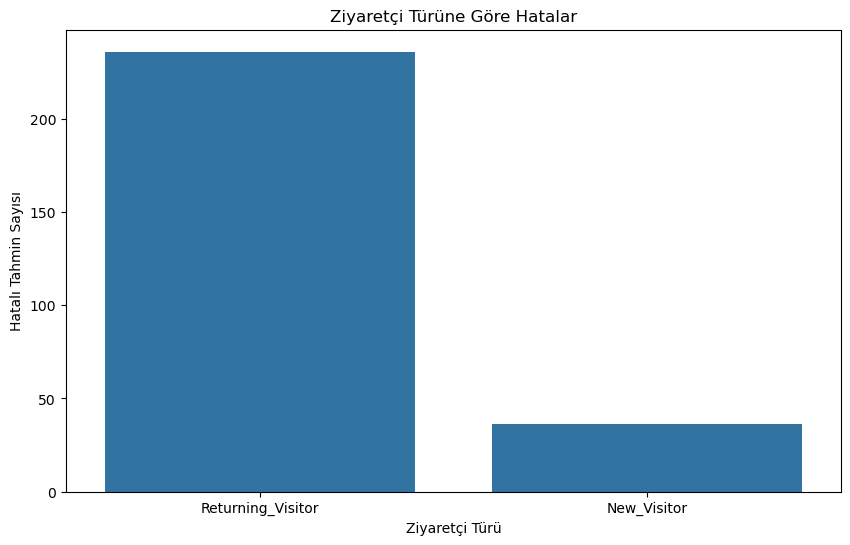

In [61]:
# ZiyaretÃ§i tÃ¼rÃ¼ iÃ§in grafik
plt.figure(figsize=(10, 6))
sns.countplot(data=hatali_kayitlar, x='ZiyaretciTuru', order=ziyaretci_hatalar.index)
plt.title('ZiyaretÃ§i TÃ¼rÃ¼ne GÃ¶re Hatalar')
plt.xlabel('ZiyaretÃ§i TÃ¼rÃ¼')
plt.ylabel('HatalÄ± Tahmin SayÄ±sÄ±')
plt.show()



In [62]:
# Ay bazlÄ± grafik
plt.figure(figsize=(10, 4))
sns.countplot(data=hatali_kayitlar, x='Ay', order=ay_hatalar.index)
plt.title('Aylara GÃ¶re Hatalar')
plt.xlabel('Ay')
plt.ylabel('HatalÄ± Tahmin SayÄ±sÄ±')
plt.xticks(rotation=45)
plt.show()

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_test != y_pred_log, y=X_test['SayfaDegeri'])
plt.title("Sayfa DeÄŸeri ile Hata Ä°liÅŸkisi")
plt.xlabel("HatalÄ± Tahmin (True = Hata)")
plt.ylabel("Sayfa DeÄŸeri")
plt.show()


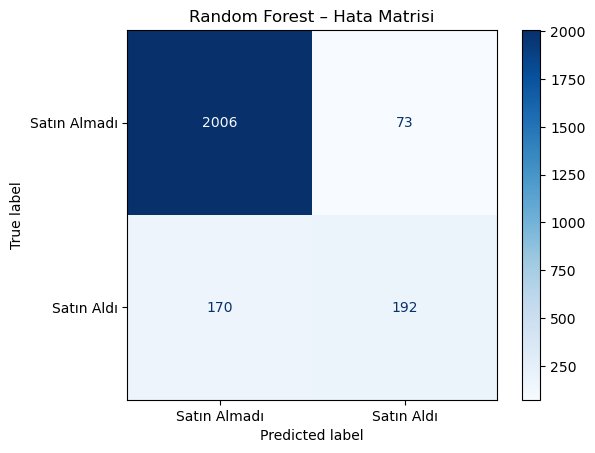

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest iÃ§in tahmin yapÄ±ldÄ±ktan sonra:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=["SatÄ±n AlmadÄ±", "SatÄ±n AldÄ±"],
    cmap="Blues"
)
plt.title("Random Forest â€“ Hata Matrisi")
plt.show()


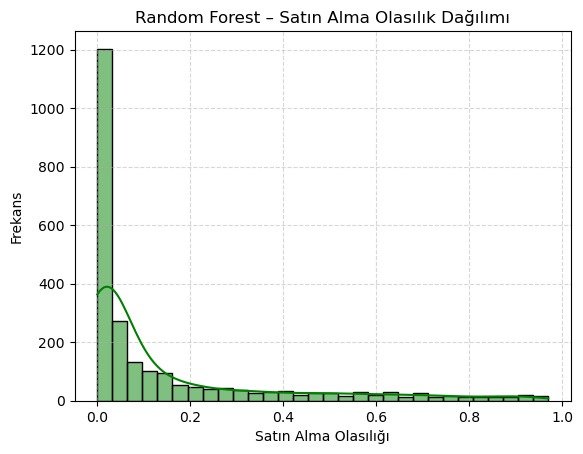

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest olasÄ±lÄ±k daÄŸÄ±lÄ±mÄ±
sns.histplot(y_proba_rf, bins=30, kde=True, color="green")
plt.title("Random Forest â€“ SatÄ±n Alma OlasÄ±lÄ±k DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("SatÄ±n Alma OlasÄ±lÄ±ÄŸÄ±")
plt.ylabel("Frekans")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Uyumlu yazÄ± tipi
plt.rcParams['font.family'] = 'DejaVu Sans'  # Bu font matplotlib ile birlikte gelir ve TÃ¼rkÃ§e karakterleri destekler

# DeÄŸerleri hesapla
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Grafik Ã§iz
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("EÅŸik (Threshold)")
plt.ylabel("DeÄŸer")
plt.title("Precision ve Recall DeÄŸiÅŸimi (Random Forest)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [76]:
import numpy as np

# Sayfa deÄŸeri dÃ¼ÅŸÃ¼k segmenti al
segment = X_test[X_test['SayfaDegeri'] < 10]

# GerÃ§ek deÄŸerler
gercekler = y_test.loc[segment.index]

# segment.index'e karÅŸÄ±lÄ±k gelen pozisyonlarÄ± al
konumlar = X_test.index.get_indexer(segment.index)

# Bu pozisyonlara karÅŸÄ±lÄ±k gelen tahminleri al
tahminler = y_pred_rf[konumlar]

# Hata sayÄ±sÄ±nÄ± hesapla
segment_hatalar = (gercekler != tahminler).sum()
print(f"ðŸ“Œ Random Forest â€“ Sayfa deÄŸeri < 10 olanlarda hata sayÄ±sÄ±: {segment_hatalar}")


ðŸ“Œ Random Forest â€“ Sayfa deÄŸeri < 10 olanlarda hata sayÄ±sÄ±: 136


In [78]:
import shap

# TreeExplainer kullan
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Ã–zellik isimlerini dÃ¼zgÃ¼n kullanmak iÃ§in DataFrame olmalÄ±
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

shap.summary_plot(shap_values, X_test)


##  Segment Analizi

MÃ¼ÅŸteriler `ZiyaretciTuru`, `Bolge` ve `Tarayici`"ye gÃ¶re segmentlere ayrÄ±lmÄ±ÅŸ ve satÄ±n alma oranlarÄ±, sitede geÃ§irilen sÃ¼re ve sayfa sayÄ±larÄ± karÅŸÄ±laÅŸtÄ±rÄ±lmÄ±ÅŸtÄ±r:

*   **ZiyaretÃ§i TÃ¼rÃ¼ Analizi:** Geri dÃ¶nen ziyaretÃ§ilerin satÄ±n alma oranlarÄ±, yeni ziyaretÃ§ilere gÃ¶re daha dÃ¼ÅŸÃ¼ktÃ¼r, ancak sitede daha fazla zaman geÃ§irme ve daha fazla Ã¼rÃ¼n sayfasÄ± ziyaret etme eÄŸilimindedirler.
*   **BÃ¶lge Analizi:** FarklÄ± bÃ¶lgelerdeki ziyaretÃ§ilerin satÄ±n alma davranÄ±ÅŸlarÄ± ve etkileÅŸim dÃ¼zeyleri arasÄ±nda farklÄ±lÄ±klar gÃ¶zlemlenmiÅŸtir.
*   **TarayÄ±cÄ± Analizi:** KullanÄ±lan tarayÄ±cÄ±ya gÃ¶re satÄ±n alma oranlarÄ± ve etkileÅŸim metrikleri deÄŸiÅŸmektedir.

In [138]:
# Test verisine tahminleri ve gerÃ§ekleri ekle
sonuc_df = X_test.copy()
sonuc_df["Gercek"] = y_test
sonuc_df["Tahmin"] = y_pred_rf  # Random Forest model tahmini
sonuc_df["SatÄ±nAlmaOranÄ±"] = y_proba_rf  # OlasÄ±lÄ±k
sonuc_df["ToplamSÃ¼re"] = X_test["ToplamSure"]
sonuc_df["SayfaSayisi"] = (
    X_test[["YonetimSayfasi", "BilgiSayfasi", "UrunSayfasi"]].sum(axis=1)
)

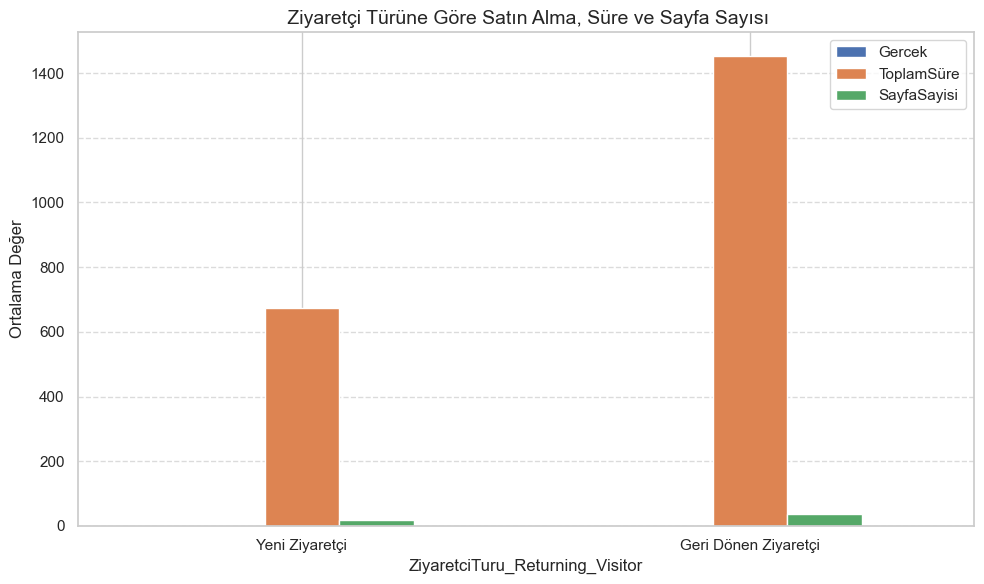

In [135]:
# ZiyaretÃ§i TÃ¼rÃ¼ Segmenti
ziyaretci_analiz = sonuc_df.groupby("ZiyaretciTuru_Returning_Visitor").agg({
    "Gercek": "mean",
    "ToplamSÃ¼re": "mean",
    "SayfaSayisi": "mean"
}).rename(index={0: "Yeni ZiyaretÃ§i", 1: "Geri DÃ¶nen ZiyaretÃ§i"})

ziyaretci_analiz.plot(kind="bar", figsize=(10, 6))
plt.title(" ZiyaretÃ§i TÃ¼rÃ¼ne GÃ¶re SatÄ±n Alma, SÃ¼re ve Sayfa SayÄ±sÄ±")
plt.ylabel("Ortalama DeÄŸer")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [136]:
# BÃ¶lge Segmenti
bolge_kolonlari = [col for col in X_test.columns if col.startswith("Bolge_")]
sonuc_df["Bolge"] = sonuc_df[bolge_kolonlari].idxmax(axis=1)

bolge_analiz = sonuc_df.groupby("Bolge").agg({
    "Gercek": "mean",
    "ToplamSÃ¼re": "mean",
    "SayfaSayisi": "mean"
})

bolge_analiz.plot(kind="bar", figsize=(12, 6))
plt.title(" BÃ¶lgeye GÃ¶re SatÄ±n Alma, SÃ¼re ve Sayfa SayÄ±sÄ±")
plt.ylabel("Ortalama DeÄŸer")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


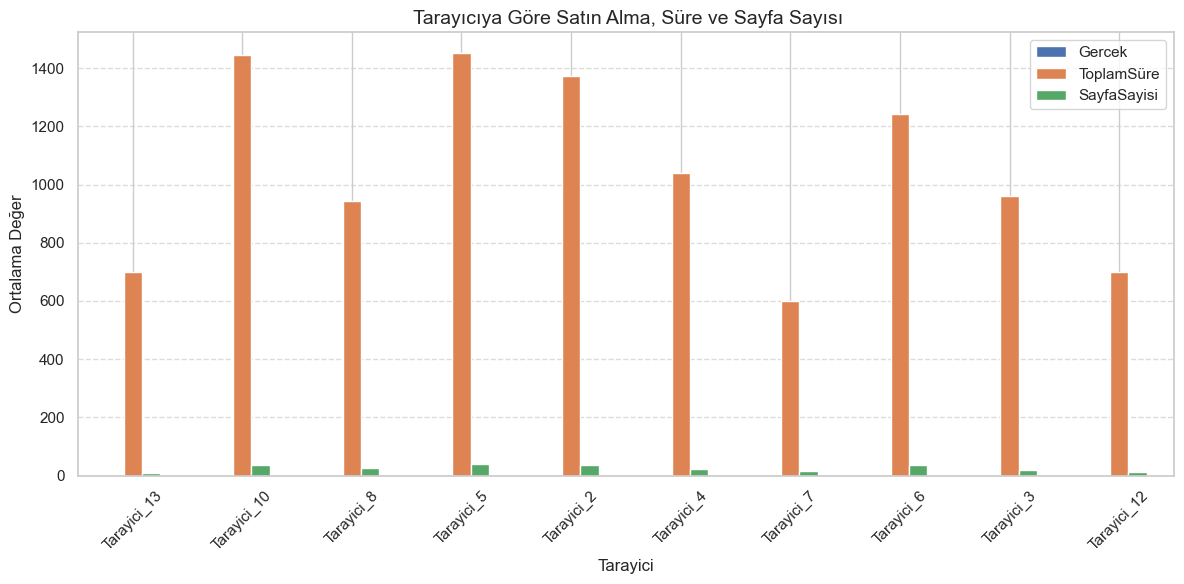

In [137]:
# TarayÄ±cÄ± Segmenti
tarayici_kolonlari = [col for col in X_test.columns if col.startswith("Tarayici_")]
sonuc_df["Tarayici"] = sonuc_df[tarayici_kolonlari].idxmax(axis=1)

tarayici_analiz = sonuc_df.groupby("Tarayici").agg({
    "Gercek": "mean",
    "ToplamSÃ¼re": "mean",
    "SayfaSayisi": "mean"
}).sort_values("Gercek", ascending=False)

tarayici_analiz.plot(kind="bar", figsize=(12, 6))
plt.title(" TarayÄ±cÄ±ya GÃ¶re SatÄ±n Alma, SÃ¼re ve Sayfa SayÄ±sÄ±")
plt.ylabel("Ortalama DeÄŸer")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Zamansal Analiz

SatÄ±n alma davranÄ±ÅŸlarÄ± aylara gÃ¶re analiz edilmiÅŸtir. AylÄ±k satÄ±n alma sayÄ±sÄ±nÄ± gÃ¶steren bir Ã§izgi grafik oluÅŸturulmuÅŸtur. (Bkz. Aylik_Satin_Alma_Sayisi.png)

*   Analiz, Ã¶zellikle **KasÄ±m** ayÄ±nda (Black Friday gibi Ã¶zel gÃ¼nler nedeniyle) satÄ±n alma sayÄ±larÄ±nda belirgin bir artÄ±ÅŸ olduÄŸunu gÃ¶stermektedir.


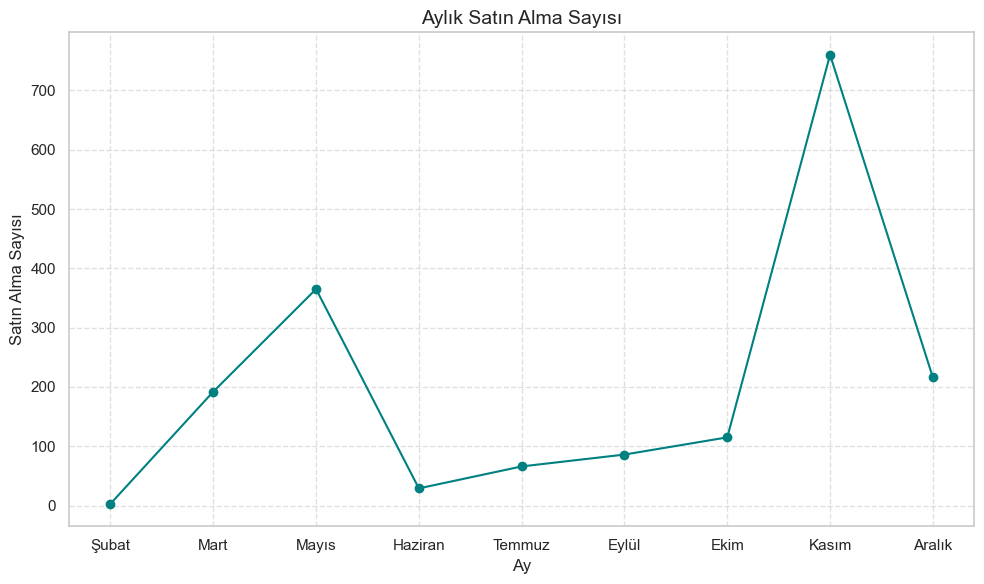

In [88]:
# Ay sÃ¼tunlarÄ±nÄ± sÄ±rayla tanÄ±mla (doÄŸru kronolojik sÄ±ra)
ay_sutunlari = ['Ay_Feb', 'Ay_Mar', 'Ay_May', 'Ay_June', 'Ay_Jul',
                'Ay_Sep', 'Ay_Oct', 'Ay_Nov', 'Ay_Dec']
ay_isimleri = ['Åžubat', 'Mart', 'MayÄ±s', 'Haziran', 'Temmuz',
               'EylÃ¼l', 'Ekim', 'KasÄ±m', 'AralÄ±k']

# SatÄ±n alma yapÄ±lan gÃ¶zlemlerden ay bazÄ±nda toplam sayÄ±larÄ± al
aylik_satinalma_sayilari = []
for ay in ay_sutunlari:
    toplam = df[df["SatinAlim"] == 1][ay].sum()
    aylik_satinalma_sayilari.append(toplam)
# Ã‡izgi grafiÄŸi oluÅŸtur
plt.figure(figsize=(10, 6))
plt.plot(ay_isimleri, aylik_satinalma_sayilari, marker='o', linestyle='-', color='teal')
plt.title("AylÄ±k SatÄ±n Alma SayÄ±sÄ±")
plt.xlabel("Ay")
plt.ylabel("SatÄ±n Alma SayÄ±sÄ±")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## DÃ¶nÃ¼ÅŸÃ¼m Hunisi Analizi

ZiyaretÃ§ilerin sitedeki yolculuklarÄ± Ã¼Ã§ ana aÅŸamada incelenmiÅŸtir: Ziyaret (Visit) â†’ EtkileÅŸim (Interaction) â†’ SatÄ±n Alma (Purchase). (Bkz. Donusum_Hunisi.png)

*   **Ziyaret:** Toplam ziyaretÃ§i sayÄ±sÄ±.
*   **EtkileÅŸim:** ÃœrÃ¼n sayfalarÄ±nÄ± ziyaret eden veya sitede belirli bir sÃ¼re geÃ§iren ziyaretÃ§iler.
*   **SatÄ±n Alma:** GerÃ§ekleÅŸen satÄ±n alma iÅŸlemleri.

Huni analizi, ziyaretÃ§ilerin hangi aÅŸamalarda kaybedildiÄŸini belirlemeye yardÄ±mcÄ± olmuÅŸtur. Ã–zellikle etkileÅŸimden satÄ±n almaya geÃ§iÅŸ aÅŸamasÄ±nda Ã¶nemli bir dÃ¼ÅŸÃ¼ÅŸ gÃ¶zlemlenmiÅŸtir.


In [101]:
from IPython.display import display
### 1. ZiyaretÃ§i TÃ¼rÃ¼ne GÃ¶re Analiz
print("\nZiyaretÃ§i TÃ¼rÃ¼ Analizi:")
visitor_type_analysis = df.groupby("ZiyaretciTuru_Returning_Visitor")[["SatinAlim", "ToplamSure", "UrunSayfasi"]].mean()
display(visitor_type_analysis)


ZiyaretÃ§i TÃ¼rÃ¼ Analizi:


SatinAlim   ToplamSure  UrunSayfasi
ZiyaretciTuru_Returning_Visitor                                     
False                             0.246900   744.725588    17.835400
True                              0.140926  1421.878615    34.462372

In [102]:
### 3. TarayÄ±cÄ±ya GÃ¶re Analiz
browser_cols = [col for col in df.columns if "Tarayici_" in col]
browser_data = df[browser_cols + ["SatinAlim", "ToplamSure", "UrunSayfasi"]]
melted_browser = browser_data.melt(id_vars=["SatinAlim", "ToplamSure", "UrunSayfasi"], var_name="Tarayici", value_name="Deger")
melted_browser = melted_browser[melted_browser["Deger"] == 1]
browser_analysis = melted_browser.groupby("Tarayici")[["SatinAlim", "ToplamSure", "UrunSayfasi"]].mean()
print("\nTarayÄ±cÄ± Analizi:")
display(browser_analysis)


TarayÄ±cÄ± Analizi:


SatinAlim   ToplamSure  UrunSayfasi
Tarayici                                        
Tarayici_10   0.196319  1334.746162    32.865031
Tarayici_11   0.166667   849.127738    12.166667
Tarayici_12   0.300000   813.288391    17.200000
Tarayici_13   0.285714   847.270841    16.125000
Tarayici_2    0.155144  1447.703877    35.126728
Tarayici_3    0.047619   797.690342    16.419048
Tarayici_4    0.177839  1261.856325    30.651163
Tarayici_5    0.184946  1278.284543    31.462366
Tarayici_6    0.114943  1313.174156    29.873563
Tarayici_7    0.122449  1047.305323    25.693878
Tarayici_8    0.155556   689.343477    18.022222
Tarayici_9    0.000000  1559.100000    10.000000

DÃ¶nÃ¼ÅŸÃ¼m Hunisi:


AÅŸama  KullaniciSayisi
0     Ziyaret            12205
1   EtkileÅŸim            12187
2  SatÄ±n Alma             1908

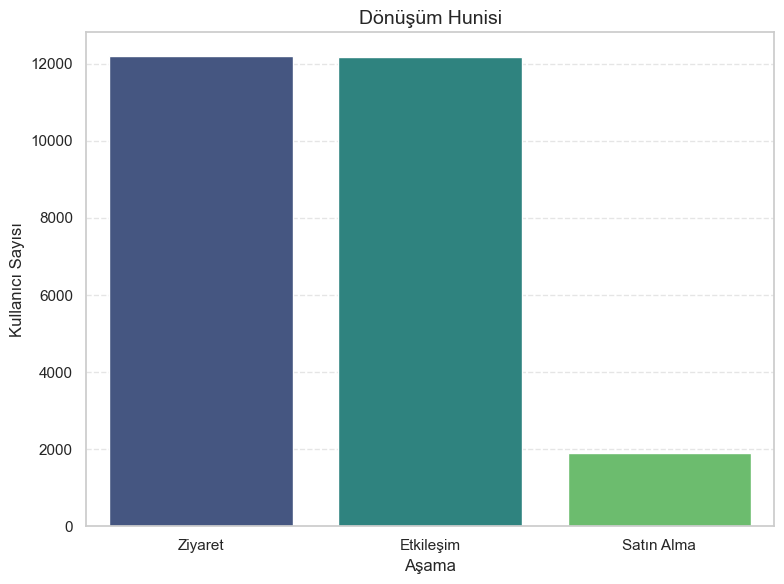

In [106]:
### 5. DÃ¶nÃ¼ÅŸÃ¼m Hunisi Analizi
toplam_ziyaret = len(df)
etkilesim = df[(df["UrunSayfasi"] > 0) | (df["ToplamSure"] > 0)].shape[0]
satin_alim = df[df["SatinAlim"] == 1].shape[0]

funnel_df = pd.DataFrame({
    "AÅŸama": ["Ziyaret", "EtkileÅŸim", "SatÄ±n Alma"],
    "KullaniciSayisi": [toplam_ziyaret, etkilesim, satin_alim]
})

from IPython.display import display

print("DÃ¶nÃ¼ÅŸÃ¼m Hunisi:")
display(funnel_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=funnel_df, x="AÅŸama", y="KullaniciSayisi", hue="AÅŸama", palette="viridis", legend=False)
plt.title("DÃ¶nÃ¼ÅŸÃ¼m Hunisi")
plt.ylabel("KullanÄ±cÄ± SayÄ±sÄ±")
plt.xlabel("AÅŸama")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##  SonuÃ§ Raporu

*   **Yeni ZiyaretÃ§ilere Destek:** Yeni ziyaretÃ§ilerin satÄ±n alma oranlarÄ± dÃ¼ÅŸÃ¼k olduÄŸundan, onlara yÃ¶nelik Ã¶zel karÅŸÄ±lama programlarÄ±, rehberler veya ilk alÄ±ÅŸveriÅŸ indirimleri sunularak dÃ¶nÃ¼ÅŸÃ¼m oranlarÄ± artÄ±rÄ±labilir.
*   **Hemen Ã‡Ä±kma OranÄ±nÄ± Azaltma:** YÃ¼ksek hemen Ã§Ä±kma oranÄ±na sahip sayfalar belirlenmeli ve bu sayfalarÄ±n iÃ§eriÄŸi, kullanÄ±cÄ± deneyimi ve Ã§aÄŸrÄ±-eylem (call-to-action) butonlarÄ± optimize edilmelidir.
*   **YÃ¼ksek DeÄŸerli SayfalarÄ±n Deneyimini Ä°yileÅŸtirme:** `SayfaDegeri` yÃ¼ksek olan sayfalarÄ±n kullanÄ±cÄ± deneyimi daha da iyileÅŸtirilmelidir. Bu sayfalar, ziyaretÃ§ilerin satÄ±n alma kararlarÄ±nÄ± etkilemede kritik rol oynamaktadÄ±r.
*   **AylÄ±k Kampanyalar:** Ã–zellikle **KasÄ±m** gibi yoÄŸun aylarda (Black Friday, Siber Pazartesi vb.) Ã¶zel kampanyalar ve indirimler dÃ¼zenlenerek satÄ±ÅŸlar maksimize edilebilir.
*   **TarayÄ±cÄ± ve BÃ¶lgeye Ã–zel Optimizasyonlar:** FarklÄ± tarayÄ±cÄ±lar ve bÃ¶lgeler iÃ§in site performansÄ±nÄ±n ve kullanÄ±cÄ± deneyiminin optimize edilmesi, genel dÃ¶nÃ¼ÅŸÃ¼m oranlarÄ±nÄ± artÄ±rabilir.
*   **DÃ¶nÃ¼ÅŸÃ¼m Hunisi Optimizasyonu:** EtkileÅŸimden satÄ±n almaya geÃ§iÅŸ aÅŸamasÄ±ndaki dÃ¼ÅŸÃ¼ÅŸÃ¼ azaltmak iÃ§in, sepet terk etme oranlarÄ±nÄ± dÃ¼ÅŸÃ¼rmeye yÃ¶nelik stratejiler (Ã¶rneÄŸin, sepet hatÄ±rlatma e-postalarÄ±, kolay Ã¶deme sÃ¼reÃ§leri) uygulanmalÄ±dÄ±r.

